# Sentiment Analysis

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

In [3]:

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [5]:
import nltk
import pandas as pd

In [6]:
# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [7]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV
%matplotlib inline

In [8]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('train_self_drive_clean.csv', encoding= 'utf-8')
data.head()

,sentiment,text,cleaned
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...
1,5,I want a Google driverless car.,want google driverless car
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...


In [9]:
data.shape

(981, 3)

## Creating sentiments

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\69785hsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sid= SentimentIntensityAnalyzer()

In [13]:
data['Sent_compound_Polarity'] = data.text.apply(lambda x:sid.polarity_scores(x)['compound'])
data['Sent_type']=''

In [14]:
data.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,
1,5,I want a Google driverless car.,want google driverless car,0.0772,
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6892,
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.9157,
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,


In [15]:
data.loc[data.Sent_compound_Polarity > 0, 'Sent_type']= 'Positive'

data.loc[data.Sent_compound_Polarity == 0, 'Sent_type']= 'Neutral'

data.loc[data.Sent_compound_Polarity < 0, 'Sent_type']= 'Negative'

In [16]:
data.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6892,Positive
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.9157,Positive
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive


In [17]:
tweets_sentiment=data.Sent_type.value_counts()
tweets_sentiment

Neutral     405
Positive    362
Negative    214
Name: Sent_type, dtype: int64

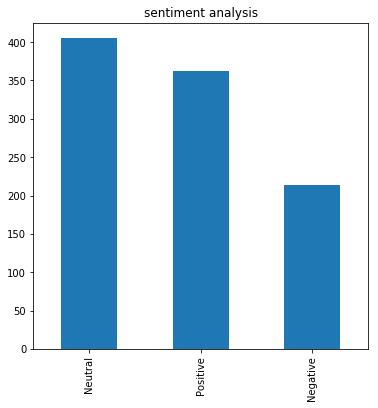

In [18]:
data.Sent_type.value_counts().plot (kind='bar' , title="sentiment analysis")

### saving as csv file

In [19]:
data.to_csv('cleaned_sentiment_self_cars.csv', index= False, encoding= 'utf-8')

In [20]:
data_sentiment = pd.read_csv('cleaned_sentiment_self_cars.csv', encoding= 'utf-8')

In [21]:
data_sentiment.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6892,Positive
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.9157,Positive
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive
